In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
import glob
import os
%matplotlib inline

## Model

In [3]:
def conf_mat(pred,truth):
    res = [0,0,0,0]
    a = 0
    
    for i in range(len(truth)):
        if truth[i] == 1:
            if truth[i] == pred[i]:
                a = 0
            else:
                a = 2
                
        else:
            if truth[i] == pred[i]:
                a = 1
            else:
                a = 3
                
        res[a] = res[a] + 1
     
    print(res)
    return res

In [4]:
def map_pred(pred):
    res = np.zeros(len(pred))
    for i in range(len(pred)):
        if pred[i] == -1:
            res[i] = 1
            
    return res

In [5]:
def naive_classifier_mean(x_test,mu,std,u_term,l_term):  
    print(mu - l_term * std,mu + u_term * std)
    predictions = np.where( (x_test > (mu + u_term * std)) | (x_test < (mu - l_term * std)), 1, 0)

    return predictions

In [6]:
def naive_classifier_mean_2(x_test,mu,std,u_term,l_term):  
    print(mu - l_term * std,mu + u_term * std)
    predictions = np.where( (x_test < (mu + u_term * std)) & (x_test > (mu - l_term * std)), 1, 0)

    return predictions

## Multi-dataset Model

In [8]:
input_dir = './../../train/KPI/'

summary = pd.DataFrame(columns=['KPI', 'TP', 'TN', 'FP', 'FN', 'PRECISION', 'RECALL', 'F1_SCORE'])

for fname in os.listdir(input_dir):
    df  = pd.read_csv(os.path.join(input_dir, fname), index_col='timestamp')
    kpi_name = df['KPI ID'].values[0]
    print(kpi_name)
    df = df.drop(['KPI ID'], axis=1)
    
    # Normalize Values
    normalized_df=(df-df.min())/(df.max()-df.min())
    normalized_df = normalized_df.astype({'label': 'int64'})
    
    # Split to Train and Test
    train_set, test_set= np.split(normalized_df, [int(.75 *len(normalized_df))])
    
    # Format Train and Test
    X = np.array(train_set['value']).reshape(-1, 1)
    y = np.array(train_set['label'])
    x_test = np.array(test_set['value']).reshape(-1,1)
    y_test = np.array(test_set['label'])
    
    
    # Check Valid Train Dataset
    if len(np.unique(y)) > 1:

        # Train Model
        model = IsolationForest(n_estimators=100,contamination=float(0.005))
    
        model.fit(df.value.values.reshape(-1, 1))

        # Make Predictions
        predictions = map_pred(model.predict(df.value.values.reshape(-1, 1)))

        # Compute Confusion Matrix
        cf = conf_mat(predictions,df.label.values) 
        

        # F1-Score
        prec = 0
        rec = 0
        f1 = 0
        if (cf[0] + cf[2]) != 0:
            prec = cf[0] / (cf[0] + cf[2])
        if (cf[0] + cf[3]) != 0:
            rec  = cf[0] / (cf[0] + cf[3])
        if (prec + rec) != 0:
            f1   = 2 * (prec * rec / (prec+rec))

    #     print(f1_score(predictions,y_test))


        summary = summary.append({'KPI': kpi_name, 
                                   'TP': cf[0],  
                                   'TN': cf[1], 
                                   'FP': cf[2], 
                                   'FN': cf[3], 
                                   'PRECISION': prec, 
                                   'RECALL': rec,     
                                   'F1_SCORE': f1 }, ignore_index=True)
        
    else:
        summary = summary.append({'KPI': kpi_name, 
                                   'TP': None,  
                                   'TN': None, 
                                   'FP': None, 
                                   'FN': None, 
                                   'PRECISION': None, 
                                   'RECALL': None,     
                                   'F1_SCORE': None }, ignore_index=True)

a40b1df87e3f1c87


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[19, 136913, 362, 631]
b3b2e6d1a791d63a


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[2, 8195, 10, 40]
da403e4e3f87c9e0


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[566, 121319, 7100, 50]
046ec29ddf80d62e


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 8660, 80, 44]
18fbb1d5a5dc099d


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[604, 121223, 7259, 42]
09513ae3e75778a3


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[7, 128115, 231, 618]
07927a9a18fa19ae


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 10775, 130, 55]
cff6d3c01e6a6bfa


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[16, 145820, 1071, 722]
54e8a140f6237526


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 8202, 4, 42]
c58bfcbacb2822d1


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 127899, 124, 644]
7c189dd36f048a6c


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[15, 146548, 411, 715]
8bef9af9a922e0b3


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[55, 128335, 472, 591]
40e25005ff8992bd


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[45, 99149, 609, 451]
76f4550c43334374


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 8653, 87, 44]
affb01ca2b4f0b45


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[49, 146408, 535, 688]
88cf3a776ba00e7c


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[224, 62230, 2882, 100]
9bd90500bfd11edb


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[16, 127842, 127, 628]
e0770391decc44ce


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[599, 143814, 2475, 136]
8a20c229e9860d0c
769894baefea4e9e


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[0, 8731, 9, 44]
1c35dbf57f55f5e4


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[611, 119262, 8970, 10]
9ee5879409dccef9


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[8, 62185, 2937, 319]
71595dd7171f4540


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[83, 145921, 1030, 634]
8c892e5525f3e491


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[438, 143763, 2645, 163]
a5bf5d65261d859a


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[15, 128073, 14, 577]
02e99bd4f6cfb33f


/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[617, 118004, 9933, 8]


In [7]:
# summary.to_csv('DT_Result.csv')

## Single Class

In [66]:
input_dir = './../../test/KPI/'
fname = 'test_88cf3a776ba00e7c.csv'
input_dir = './../../train/KPI/'
fname = 'train_88cf3a776ba00e7c.csv'

summary = pd.DataFrame(columns=['KPI', 'TP', 'TN', 'FP', 'FN', 'PRECISION', 'RECALL', 'F1_SCORE'])

df  = pd.read_csv(os.path.join(input_dir, fname), index_col='timestamp')
kpi_name = df['KPI ID'].values[0]
print(kpi_name)
df = df.drop(['KPI ID'], axis=1)

# Format Train and Test
# X = np.array(train_set['value']).reshape(-1, 1)
# x_test = np.array(test_set['value']).reshape(-1,1)


model = IsolationForest(n_estimators=100,contamination=float(0.1))

model.fit(df.value.values.reshape(-1, 1))

# Make Predictions
predictions = map_pred(model.predict(df.value.values.reshape(-1, 1)))

# Compute Confusion Matrix
#     cf = conf_mat(predictions,df.label.values) 


88cf3a776ba00e7c


/home/millana/anaconda3/envs/machineLearning/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/millana/anaconda3/envs/machineLearning/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [67]:
f1_score(predictions,df.label.values)

0.16808290155440417

In [68]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0.0: 58892, 1.0: 6544}

In [69]:
df['pred'] = predictions

In [55]:
df[df['pred'] == 1]

,value,pred
timestamp,,
2017-07-16 08:03:00,10702.0,1.0
2017-07-16 08:32:00,10970.0,1.0
2017-07-16 14:02:00,10888.0,1.0
2017-07-16 14:03:00,11015.0,1.0
2017-07-16 14:04:00,10724.0,1.0
...,...,...
2017-10-25 21:44:00,2200.0,1.0
2017-10-25 21:45:00,2178.0,1.0
2017-10-25 21:50:00,2150.0,1.0


## Plot

In [70]:
df.label = df.label * 0.1

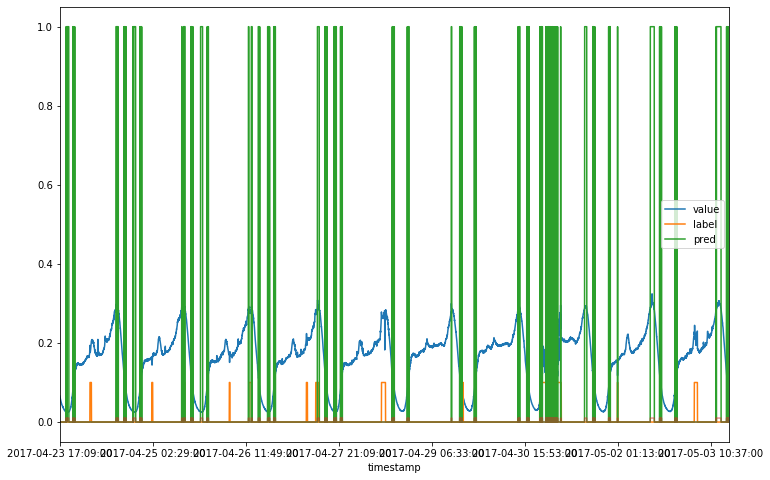

In [73]:
df.head(1440*10).plot(kind='line',figsize=(12,8))
plt.plot(predictions*0.1,alpha=.5)
# plt.plot(np.squeeze(df_pred.values.T)*1000)